In [1]:
# sources : https://arxiv.org/pdf/1912.07242v1.pdf
# je vais essayer de reproduire ça

In [2]:
# some imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def get_data(nb_features, nb_train_data, nb_test_data, mean_X, std_X, mean_epsilon0, std_epsilon0, mean_epsilon1, std_epsilon1, random_seed):
    
    np.random.seed(random_seed)

    epsilon0 = np.random.normal(mean_epsilon0, std_epsilon0, (nb_train_data, nb_features+1))
    testEpsilon0 = np.random.normal(mean_epsilon0, std_epsilon0, (nb_test_data, nb_features+1)) 
    
    epsilon1 = np.random.normal(mean_epsilon1, std_epsilon1, (nb_train_data))
    testEpsilon1 = np.random.normal(mean_epsilon1, std_epsilon1, (nb_test_data))

    X = np.random.normal(mean_X,std_X,(nb_train_data, nb_features+1))
    testX = np.random.normal(mean_X, std_X, (nb_test_data, nb_features+1))

    Xtilde = X+epsilon0
    testXtilde = testX+testEpsilon0

    
    X.T[0] = np.ones(nb_train_data)
    testX.T[0] = np.ones(nb_test_data) 
    Xtilde.T[0] = np.ones(nb_train_data)
    testXtilde.T[0] = np.ones(nb_test_data)

    w = np.random.uniform(-10, 10, nb_features+1)
    w = w/np.sqrt(np.sum(w**2))

    y = X@w
    testY = testX@w

    ytilde = y+epsilon1
    testYtilde = testY+testEpsilon1
    
    return  w, X, Xtilde, y, ytilde,testX, testXtilde, testY, testYtilde

In [4]:
nb_experiment = 1
nb_features = 1000
max_nb_train_data = 100
nb_test_data = 100


mean_X = 0
std_X = 1

mean_epsilon0 = 0
std_epsilon0 = 0

mean_epsilon1 = 0
std_epsilon1 = 0



list_mse_y = []
list_mse_ytilde = []
list_mse_testY = []
list_mse_testYtilde = []

for random_seed in range(nb_experiment):
    w, X, Xtilde, y, ytilde,testX, testXtilde, testY, testYtilde = get_data(nb_features, max_nb_train_data, nb_test_data, mean_X, std_X, mean_epsilon0, std_epsilon0, mean_epsilon1, std_epsilon1, random_seed)
    
    for i in range(max_nb_train_data):
        i+=1

        what = np.linalg.solve(X[:i].T@X[:i], X[:i].T@ytilde[:i])

        yhat      = Xtilde@what
        testYyhat = testXtilde@what

        mse_y          = np.sum((y-yhat)**2)
        mse_ytilde     = np.sum((ytilde-yhat)**2)
        mse_testY      = np.sum((testY - testYyhat)**2)
        mse_testYtilde = np.sum((testYtilde - testYyhat)**2)

        try:
            list_mse_y[i-1]          += mse_y
            list_mse_ytilde[i-1]     += mse_ytilde
            list_mse_testY[i-1]      += mse_testY
            list_mse_testYtilde[i-1] += mse_testYtilde
        except:
            list_mse_y.append(mse_y)
            list_mse_ytilde.append(mse_ytilde)
            list_mse_testY.append(mse_testY)
            list_mse_testYtilde.append(mse_testYtilde)


(0.0, 100000.0)

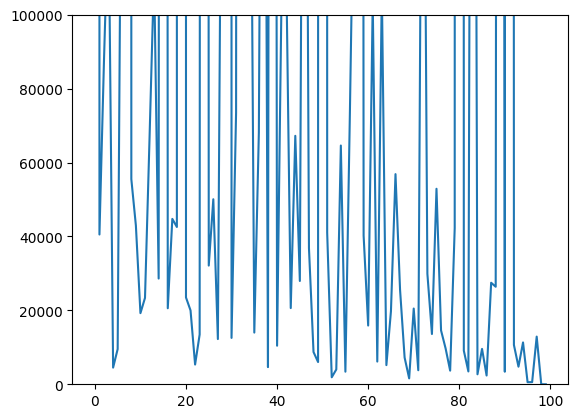

In [5]:

plt.plot(range(max_nb_train_data), list_mse_ytilde)
# plt.plot(range(max_nb_train_data), sum_mse_of_bias_variance_tradeoff, color="red")
plt.ylim([0, 100000])